In [14]:
import supervisely_lib as sly
import matplotlib.pyplot as plt
from Layer import Layer
import layers
from random import randint
import os.path as osp

%matplotlib inline

In [5]:
custom_settings = {
  "action": "custom",
  "src": ["$data1"],
  "dst": "$data2"
}

In [6]:
custom_layer = layers.processing.CustomLayer.CustomLayer(custom_settings)

In [8]:
task_paths = sly.TaskPaths()
project_dir = task_paths.project_dir
project_meta = sly.ProjectMeta.from_dir(project_dir)

In [9]:
fs = sly.ProjectFS.from_disk(*sly.ProjectFS.split_dir_project(project_dir))

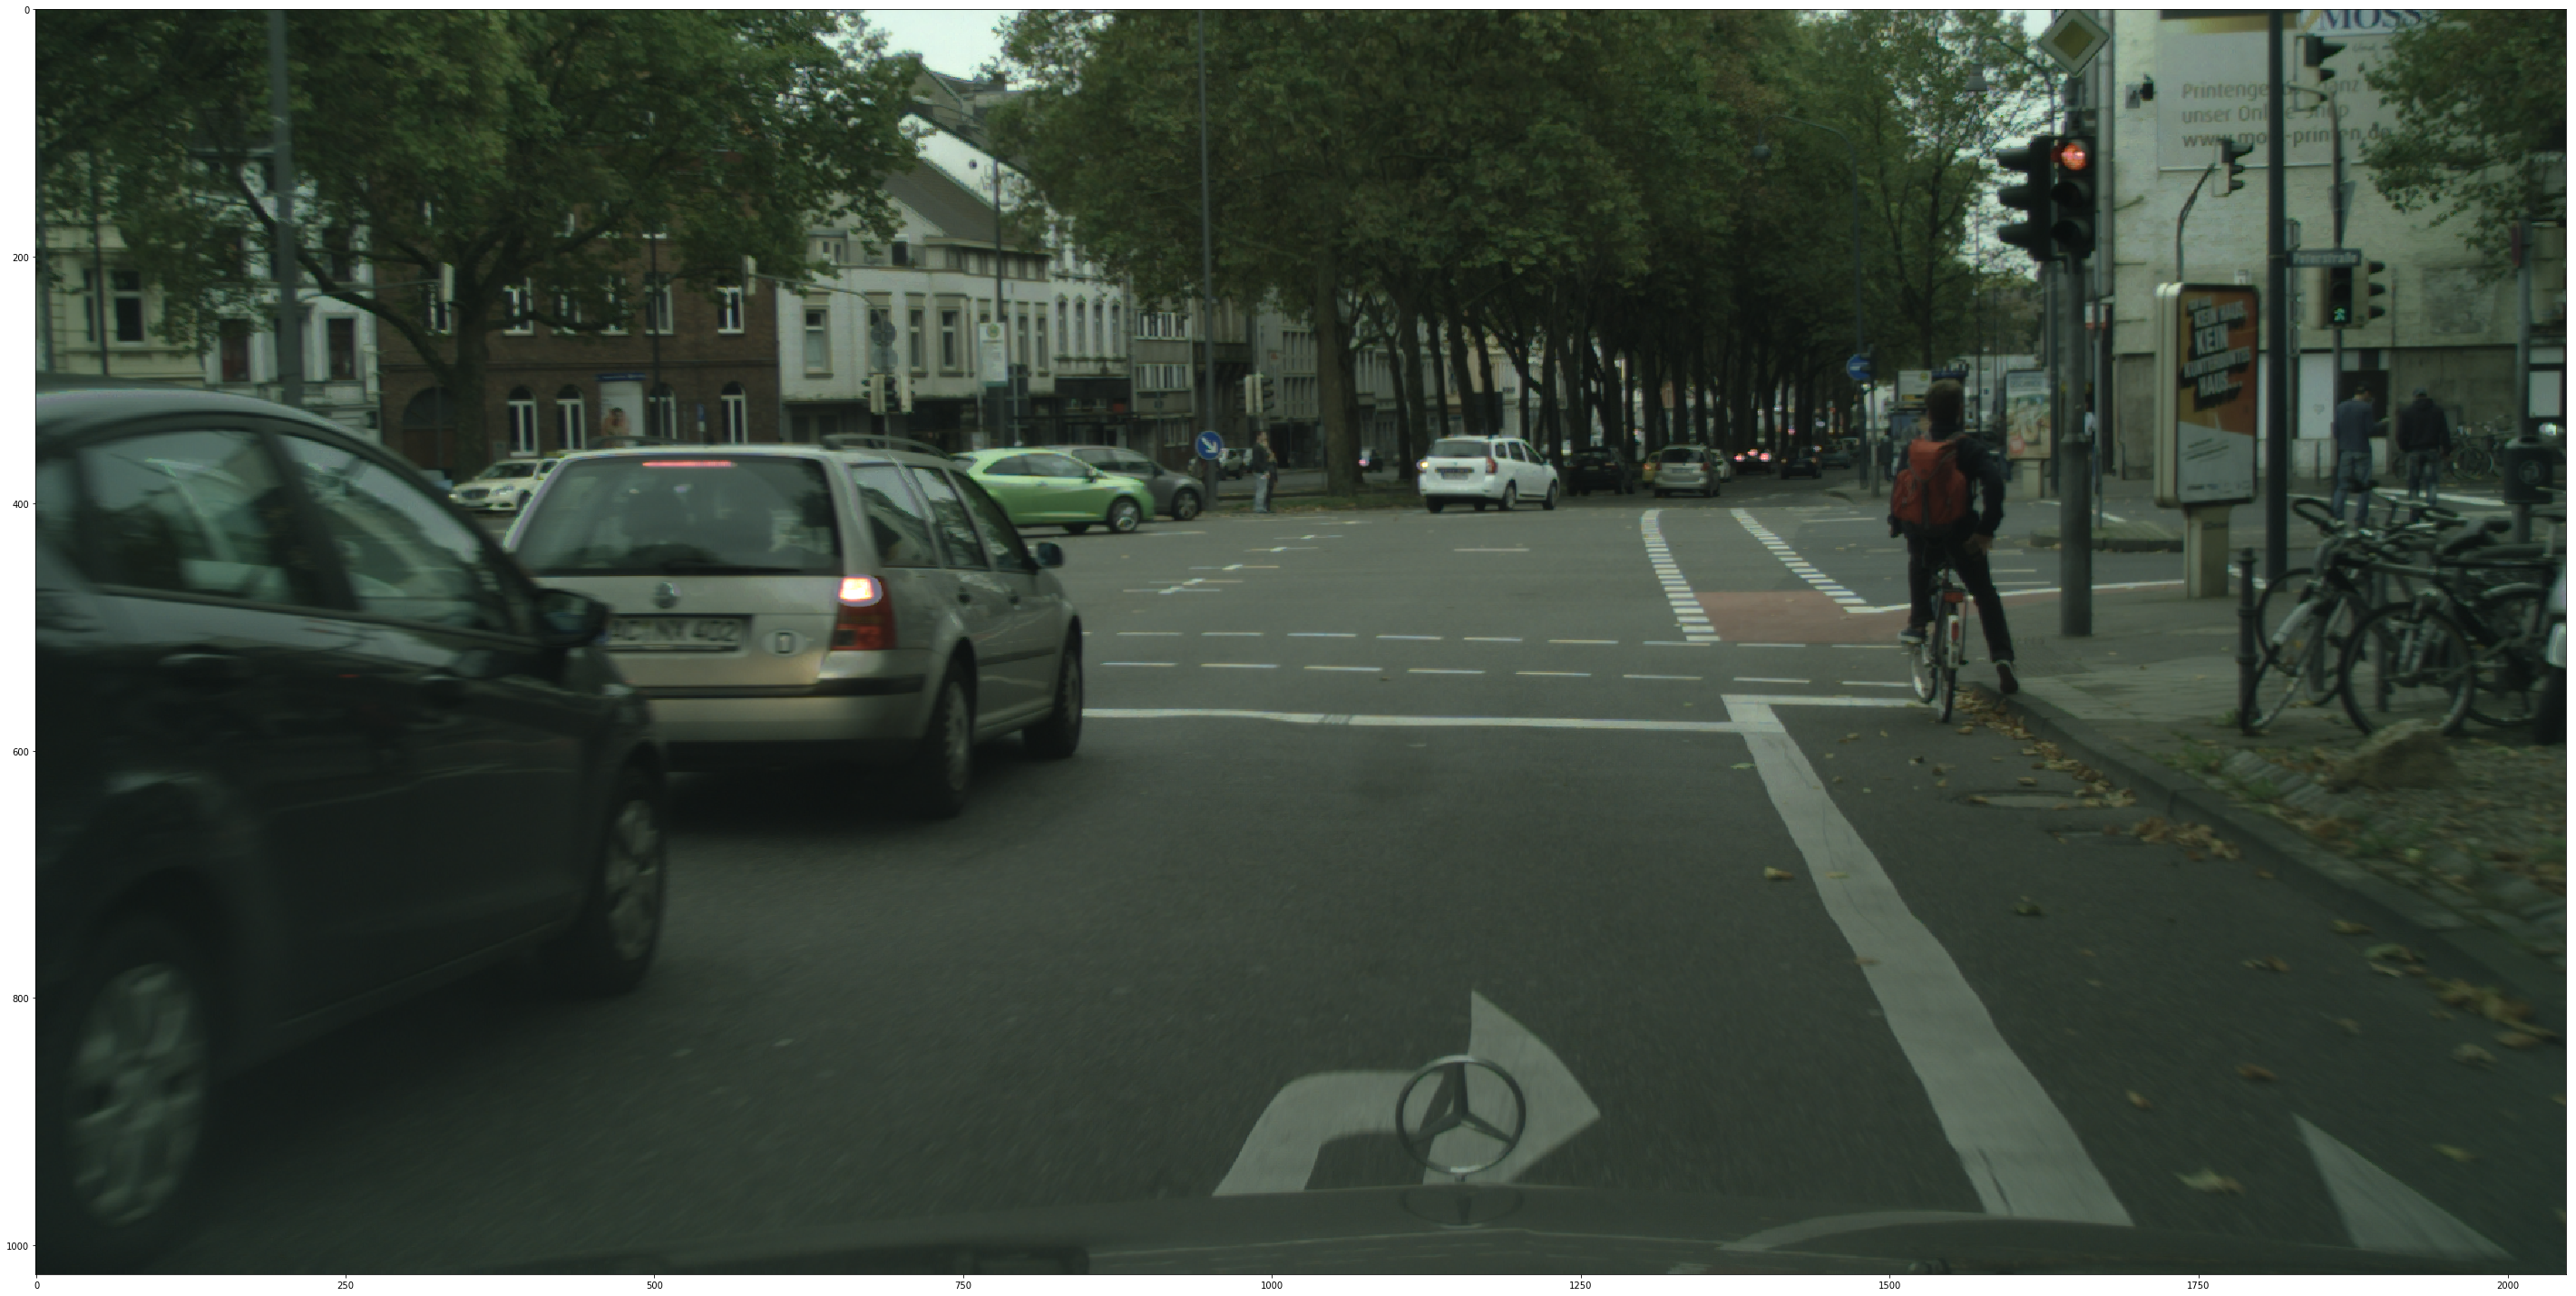

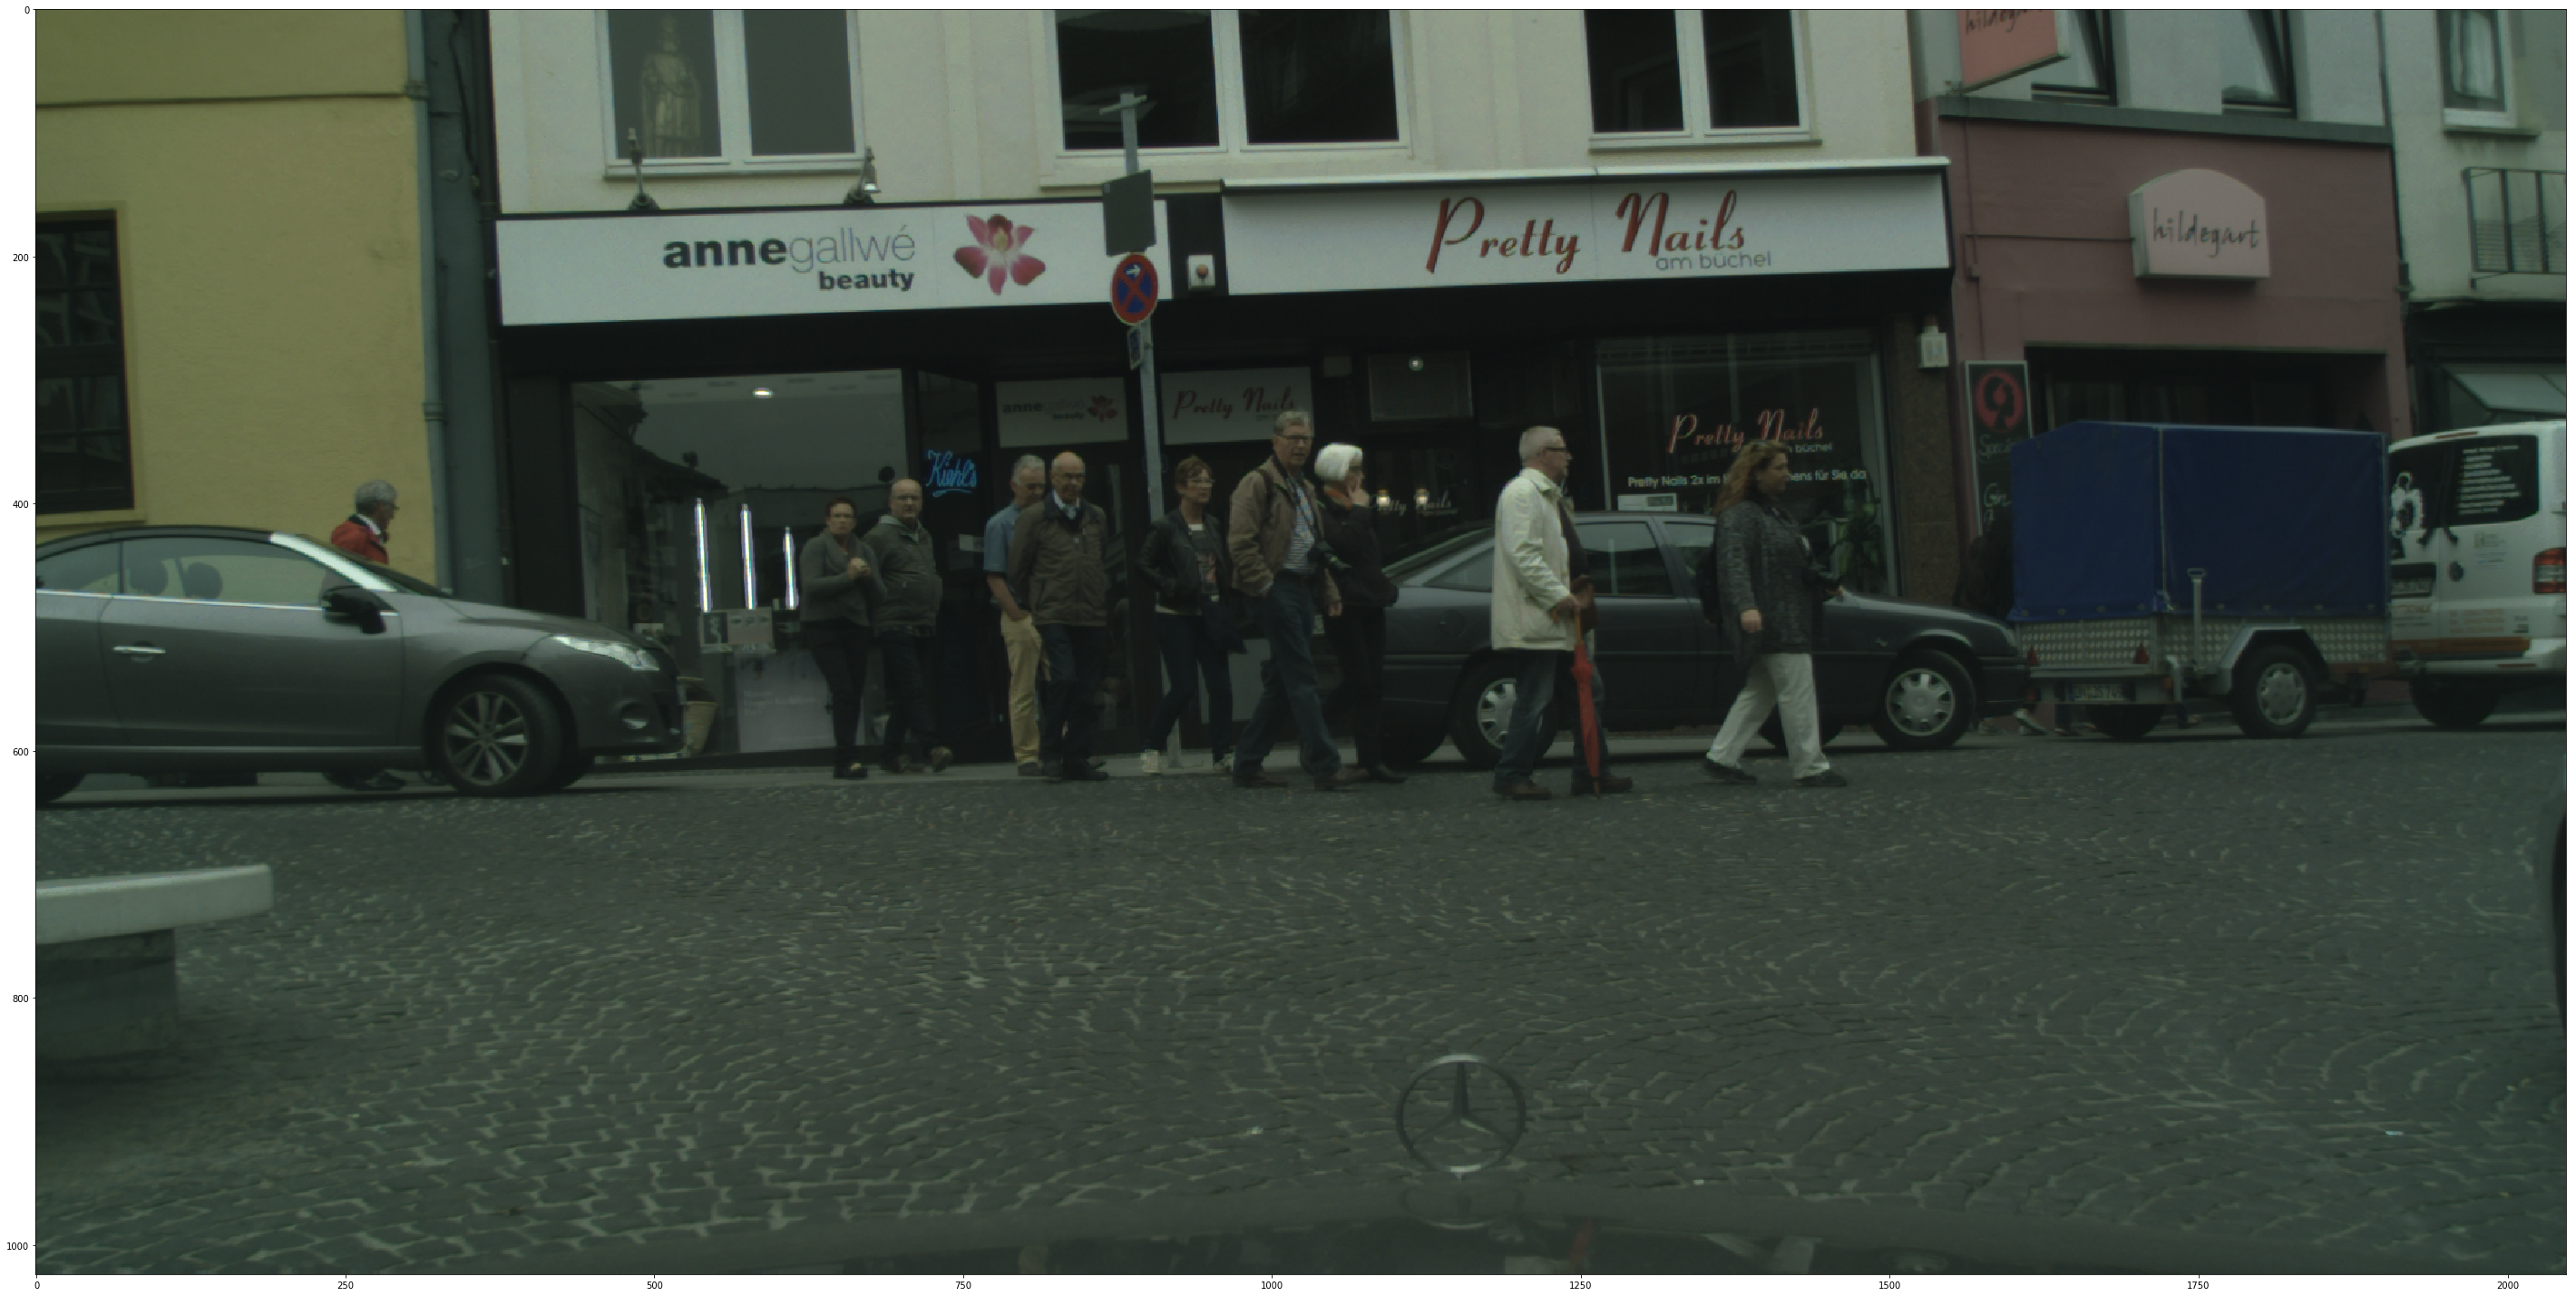

In [15]:
for sample_info in fs:
    img_desc = sly.ImageDescriptor(sample_info)
    old_img = img_desc.read_image()
    ann_packed = sly.json_load(sample_info.ann_path)
    ann = sly.Annotation.from_packed(ann_packed, project_meta)
    for obj in ann._data['objects']:
        obj.draw(old_img, [255,0,0])
    data_el = (img_desc, ann)
    custom_img = custom_layer.process(data_el)
    plt.figure(figsize=(50, 50))
    plt.subplot(1, 2, 1)
    plt.imshow(old_img)
    plt.subplot(1, 2, 2)
    for new_img_desc, new_ann in custom_img:
        img = new_img_desc.read_image()
        for obj in new_ann._data['objects']:
            if obj.class_title == 'rand_rect' or obj.class_title == 'rand_polygon':
                color = [0,255,0]
            else:
                color = [255,0,0]
            obj.draw(img, color)
    plt.imshow(img)
plt.show()